# Mushrooms

### Classification using the mushroom dataset from the Kaggle/UCI machine learning

### Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

What types of machine learning models perform best on this dataset?

Which features are most indicative of a poisonous mushroom?

### About

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
#-----------------------------------------------------#
import numpy as np
import pandas as pd
#-----------------------------------------------------#
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

# K-Fold Cross Validation
from sklearn.model_selection import KFold
#-----------------------------------------------------#
# Accuracy metric
from sklearn.metrics import accuracy_score

# F1 score metric
from sklearn.metrics import f1_score

# Precision metric
from sklearn.metrics import precision_score

# Recall metric
from sklearn.metrics import recall_score

# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# To save and load a model
import pickle

In [2]:
filename = 'mushrooms.csv'

dataset = pd.read_csv(filename)

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.shape

(8124, 23)

Checking for unique values in the columns

In [5]:
dataset.loc[:,"class"].unique()

array(['p', 'e'], dtype=object)

In [6]:
dataset.loc[:,"cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [7]:
dataset.loc[:,"cap-surface"].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [8]:
dataset.loc[:,"cap-color"].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

In [9]:
dataset.loc[:,"bruises"].unique()

array(['t', 'f'], dtype=object)

In [10]:
dataset.loc[:,"odor"].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [11]:
dataset.loc[:,"gill-attachment"].unique()

array(['f', 'a'], dtype=object)

In [12]:
dataset.loc[:,"gill-spacing"].unique()

array(['c', 'w'], dtype=object)

In [13]:
dataset.loc[:,"gill-size"].unique()

array(['n', 'b'], dtype=object)

In [14]:
dataset.loc[:,"gill-color"].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

In [15]:
dataset.loc[:,"stalk-shape"].unique()

array(['e', 't'], dtype=object)

In [16]:
dataset.loc[:,"stalk-root"].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [17]:
dataset.loc[:,"stalk-surface-above-ring"].unique()

array(['s', 'f', 'k', 'y'], dtype=object)

In [18]:
dataset.loc[:,"stalk-surface-below-ring"].unique()

array(['s', 'f', 'y', 'k'], dtype=object)

In [19]:
dataset.loc[:,"stalk-color-above-ring"].unique()

array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object)

In [20]:
dataset.loc[:,"stalk-color-below-ring"].unique()

array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object)

In [21]:
dataset.loc[:,"veil-type"].unique()

array(['p'], dtype=object)

In [22]:
dataset.loc[:,"veil-color"].unique()

array(['w', 'n', 'o', 'y'], dtype=object)

In [23]:
dataset.loc[:,"ring-number"].unique()

array(['o', 't', 'n'], dtype=object)

In [24]:
dataset.loc[:,"ring-type"].unique()

array(['p', 'e', 'l', 'f', 'n'], dtype=object)

In [25]:
dataset.loc[:,"spore-print-color"].unique()

array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=object)

In [26]:
dataset.loc[:,"population"].unique()

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

In [27]:
dataset.loc[:,"habitat"].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

## Data preprocessing

The data are categoricals, but their values are letters. So, what I will do is replace them with numerical values.

The following rules will be adopted.

Attribute Information: (classes: edible=e(0), poisonous=p(1))

cap-shape: bell=b(1),conical=c(2),convex=x(3),flat=f(4), knobbed=k(5),sunken=s(6)

cap-surface: fibrous=f(1),grooves=g(2),scaly=y(3),smooth=s(4)

cap-color: brown=n(1),buff=b(2),cinnamon=c(3),gray=g(4),green=r(5),pink=p(6),purple=u(7),red=e(8),white=w(9),yellow=y(10)

bruises: bruises=t(1),no=f(0)

odor: almond=a(1),anise=l(2),creosote=c(3),fishy=y(4),foul=f(5),musty=m(6),none=n(7),pungent=p(8),spicy=s(9)

gill-attachment: attached=a(1),descending=d(2),free=f(3),notched=n(4)

gill-spacing: close=c(1),crowded=w(2),distant=d(3)

gill-size: broad=b(1),narrow=n(0)

gill-color: black=k(1),brown=n(2),buff=b(3),chocolate=h(4),gray=g(5), green=r(6),orange=o(7),pink=p(8),purple=u(9),red=e(10),white=w(11),yellow=y(12)

stalk-shape: enlarging=e(1),tapering=t(0)

stalk-root: bulbous=b(1),club=c(2),cup=u(3),equal=e(4),rhizomorphs=z(5),rooted=r(6),missing=?(7)

stalk-surface-above-ring: fibrous=f(1),scaly=y(2),silky=k(3),smooth=s(4)

stalk-surface-below-ring: fibrous=f(1),scaly=y(2),silky=k(3),smooth=s(4)

stalk-color-above-ring: brown=n(1),buff=b(2),cinnamon=c(3),gray=g(4),orange=o(5),pink=p(6),red=e(7),white=w(8),yellow=y(9)

stalk-color-below-ring: brown=n(1),buff=b(2),cinnamon=c(3),gray=g(4),orange=o(5),pink=p(6),red=e(7),white=w(8),yellow=y(9)

veil-type: partial=p(1),universal=u(0)

veil-color: brown=n(1),orange=o(2),white=w(3),yellow=y(4)

ring-number: none=n(0),one=o(1),two=t(2)

ring-type: cobwebby=c(1),evanescent=e(2),flaring=f(3),large=l(4),none=n(5),pendant=p(6),sheathing=s(7),zone=z(8)

spore-print-color: black=k(1),brown=n(2),buff=b(3),chocolate=h(4),green=r(5),orange=o(6),purple=u(7),white=w(8),yellow=y(9)

population: abundant=a(1),clustered=c(2),numerous=n(3),scattered=s(4),several=v(5),solitary=y(6)

habitat: grasses=g(1),leaves=l(2),meadows=m(3),paths=p(4),urban=u(5),waste=w(6),woods=d(7)

In [28]:
# creating dictionaries
classes_d = {'e':0, 'p':1}
cap_shape_d = {'b':1, 'c':2, 'x':3, 'f':4, 'k':5, 's':6}
cap_surface_d = {'f':1, 'g':2, 'y':3, 's':4}
cap_color_d = {'n':1, 'b':2, 'c':3, 'g':4, 'r':5, 'p':6, 'u':7, 'e':8, 'w':9, 'y':10}
bruises_d = {'t':1, 'f':0}
odor_d = {'a':1, 'l':2, 'c':3, 'y':4, 'f':5, 'm':6, 'n':7, 'p':8, 's':9}
gill_attachment_d ={'a':1, 'd':2, 'f':3, 'n':4}
gill_spacing_d = {'c':1, 'w':2, 'd':3}
gill_size_d = {'b':1, 'n':0}
gill_color_d = {'k':1, 'n':2, 'b':3, 'h':4, 'g':5, 'r':6, 'o':7, 'p':8, 'u':9, 'e':10, 'w':11, 'y':12}
stalk_shape_d = {'e':1, 't':0}
stalk_root_d = {'b':1, 'c':2, 'u':3, 'e':4, 'z':5, 'r':6, '?':7}
stalk_surface_above_ring_d = {'f':1, 'y':2, 'k':3, 's':4}
stalk_surface_below_ring_d = {'f':1, 'y':2, 'k':3, 's':4}
stalk_color_above_ring_d = {'n':1, 'b':2, 'c':3, 'g':4, 'o':5, 'p':6, 'e':7, 'w':8, 'y':9}
stalk_color_below_ring_d = {'n':1, 'b':2, 'c':3, 'g':4, 'o':5, 'p':6, 'e':7, 'w':8, 'y':9}
veil_type_d = {'p':1, 'u':0}
veil_color_d = {'n':1, 'o':2, 'w':3, 'y':4}
ring_number_d = {'n':0, 'o':1, 't':2}
ring_type_d = {'c':1, 'e':2, 'f':3, 'l':4, 'n':5, 'p':6, 's':7, 'z':8}
spore_print_color_d = {'k':1, 'n':2, 'b':3, 'h':4, 'r':5, 'o':6, 'u':7, 'w':8, 'y':9}
population_d = {'a':1, 'c':2, 'n':3, 's':4, 'v':5, 'y':6}
habitat_d = {'g':1, 'l':2, 'm':3, 'p':4, 'u':5, 'w':6, 'd':7}

In [29]:
# creating an iterable (in the case, a list) for the dictionaries
dicts = [classes_d,
         cap_shape_d,
         cap_surface_d,
         cap_color_d,
         bruises_d,
         odor_d,
         gill_attachment_d,
         gill_spacing_d,
         gill_size_d,
         gill_color_d,
         stalk_shape_d,
         stalk_root_d,
         stalk_surface_above_ring_d,
         stalk_surface_below_ring_d,
         stalk_color_above_ring_d,
         stalk_color_below_ring_d,
         veil_type_d,
         veil_color_d,
         ring_number_d,
         ring_type_d,
         spore_print_color_d,
         population_d,
         habitat_d
        ]

In [30]:
# some tests
for column in dataset.columns:
    print(column)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [31]:
# creating a new dataset to keep the original the same
numerical_dataset = dataset.copy()

In [32]:
numerical_dataset.iloc[:,0]

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [33]:
for value in numerical_dataset.iloc[:,0].unique():
    print(value)

p
e


In [34]:
# Replacing the values with the dictionaries
for indc, col in enumerate(numerical_dataset):
    for value in numerical_dataset.iloc[:,indc].unique():
        numerical_dataset[col] = numerical_dataset[col].replace([value], dicts[indc][value])

In [35]:
numerical_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,3,4,1,1,8,3,1,0,1,...,4,8,8,1,3,1,6,1,4,5
1,0,3,4,10,1,1,3,1,1,1,...,4,8,8,1,3,1,6,2,3,1
2,0,1,4,9,1,2,3,1,1,2,...,4,8,8,1,3,1,6,2,3,3
3,1,3,3,9,1,8,3,1,0,2,...,4,8,8,1,3,1,6,1,4,5
4,0,3,4,4,0,7,3,2,1,1,...,4,8,8,1,3,1,2,2,1,1


In [36]:
# Something to make the print output prettier.
class color_for_print:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Training and evaluating the model

<b>Model</b>: Decision Tree<br>
<b>Criterion</b>: 'gini'<br>
<b>Pruning</b>: No (max_depth=None)<br>
<b>Cross-Validation</b>: KFold (5 folds)<br>
<b>Metrics</b>: Accuracy, F1, Precision, Recall<br>

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=None)

y_true_train = np.array([])
y_pred_train = np.array([])

y_true_test = np.array([])
y_pred_test = np.array([])

for train, test in kf.split(numerical_dataset):
    x_train, x_test = numerical_dataset.values[train], numerical_dataset.values[test]
    
    # The target class is in the first column (column 0)
    y_train = x_train[:,0]
    x_train = x_train[:,1:]
    y_test = x_test[:,0]
    x_test = x_test[:,1:]
    
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=None)
    # training
    dtc.fit(x_train, y_train)
    
    # predictions for the training set
    for indx, input_ in enumerate(x_train):
        y_true_train = np.append(y_true_train, y_train[indx])
        y_pred_train = np.append(y_pred_train, dtc.predict([input_]))
    
    # predictions for the testing set
    for indx, input_ in enumerate(x_test):
        y_true_test = np.append(y_true_test, y_test[indx])
        y_pred_test = np.append(y_pred_test, dtc.predict([input_]))
    

# Evaluating the results

print(color_for_print.BOLD + color_for_print.RED + 'Training Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_train, y_pred_train))
print('F1 score: ',f1_score(y_true_train, y_pred_train, average='macro'))
print('Precision score: ',precision_score(y_true_train, y_pred_train, average='macro'))
print('Recall score: ', recall_score(y_true_train, y_pred_train, average='macro'))
print(30*'-')
print(color_for_print.BOLD + color_for_print.BLUE + 'Testing Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_test, y_pred_test))
print('F1 score: ',f1_score(y_true_test, y_pred_test, average='macro'))
print('Precision score: ',precision_score(y_true_test, y_pred_test, average='macro'))
print('Recall score: ', recall_score(y_true_test, y_pred_test, average='macro'))

Training Set
Accuracy:  1.0
F1 score:  1.0
Precision score:  1.0
Recall score:  1.0
------------------------------
Testing Set
Accuracy:  1.0
F1 score:  1.0
Precision score:  1.0
Recall score:  1.0


These results are kind of odd... although some people say it is possible for this dataset.

In [38]:
input_

array([ 3,  4,  1,  0,  7,  1,  1,  1, 12,  1,  7,  4,  4,  5,  5,  1,  1,
        1,  6,  3,  5,  2], dtype=int64)

In [39]:
y_test[indx]

0

In [40]:
dtc.predict([input_])

array([0], dtype=int64)

In [41]:
pd.DataFrame(x_train, columns=[numerical_dataset.columns[1:]])

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,3,4,1,1,8,3,1,0,1,1,...,4,8,8,1,3,1,6,1,4,5
1,3,4,10,1,1,3,1,1,1,1,...,4,8,8,1,3,1,6,2,3,1
2,3,3,9,1,8,3,1,0,2,1,...,4,8,8,1,3,1,6,1,4,5
3,3,4,4,0,7,3,2,1,1,0,...,4,8,8,1,3,1,2,2,1,1
4,3,3,10,1,1,3,1,1,2,1,...,4,8,8,1,3,1,6,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,5,4,8,0,4,3,1,0,3,0,...,4,6,8,1,3,1,2,8,5,7
6496,5,4,1,0,7,1,1,1,12,1,...,4,5,5,1,2,1,6,3,2,2
6497,4,4,1,0,7,1,1,1,2,1,...,4,5,5,1,2,1,6,3,2,2
6498,5,3,1,0,4,3,1,0,3,0,...,3,8,8,1,3,1,2,8,5,2


In [42]:
pd.DataFrame(y_train, columns=[numerical_dataset.columns[0]])

,class
0,1
1,0
2,1
3,0
4,0
...,...
6495,1
6496,0
6497,0
6498,1


<b>Model</b>: Decision Tree<br>
<b>Criterion</b>: 'gini'<br>
<b>Pruning</b>: Yes (max_depth=5)<br>
<b>Cross-Validation</b>: KFold (5 folds)<br>
<b>Metrics</b>: Accuracy, F1, Precision, Recall<br>

In [43]:
kf = KFold(n_splits=5, shuffle=True, random_state=None)

y_true_train = np.array([])
y_pred_train = np.array([])

y_true_test = np.array([])
y_pred_test = np.array([])

for train, test in kf.split(numerical_dataset):
    x_train, x_test = numerical_dataset.values[train], numerical_dataset.values[test]
    
    # The target class is in the first column (column 0)
    y_train = x_train[:,0]
    x_train = x_train[:,1:]
    y_test = x_test[:,0]
    x_test = x_test[:,1:]
    
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
    # training
    dtc.fit(x_train, y_train)
    
    # predictions for the training set
    for indx, input_ in enumerate(x_train):
        y_true_train = np.append(y_true_train, y_train[indx])
        y_pred_train = np.append(y_pred_train, dtc.predict([input_]))
    
    # predictions for the testing set
    for indx, input_ in enumerate(x_test):
        y_true_test = np.append(y_true_test, y_test[indx])
        y_pred_test = np.append(y_pred_test, dtc.predict([input_]))
    

# Evaluating the results

print(color_for_print.BOLD + color_for_print.RED + 'Training Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_train, y_pred_train))
print('F1 score: ',f1_score(y_true_train, y_pred_train, average='macro'))
print('Precision score: ',precision_score(y_true_train, y_pred_train, average='macro'))
print('Recall score: ', recall_score(y_true_train, y_pred_train, average='macro'))
print(30*'-')
print(color_for_print.BOLD + color_for_print.BLUE + 'Testing Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_test, y_pred_test))
print('F1 score: ',f1_score(y_true_test, y_pred_test, average='macro'))
print('Precision score: ',precision_score(y_true_test, y_pred_test, average='macro'))
print('Recall score: ', recall_score(y_true_test, y_pred_test, average='macro'))

Training Set
Accuracy:  0.9935376661742984
F1 score:  0.9935320448556351
Precision score:  0.9933854101045736
Recall score:  0.9937618821292775
------------------------------
Testing Set
Accuracy:  0.9923682914820285
F1 score:  0.9923621695873484
Precision score:  0.9922071392659628
Recall score:  0.9926330798479088


[Text(0.53125, 0.9166666666666666, 'X[19] <= 3.5\ngini = 0.499\nsamples = 6500\nvalue = [3368, 3132]'),
 Text(0.3125, 0.75, 'X[7] <= 0.5\ngini = 0.205\nsamples = 3113\nvalue = [2752, 361]'),
 Text(0.25, 0.5833333333333334, 'X[1] <= 2.0\ngini = 0.36\nsamples = 472\nvalue = [111, 361]'),
 Text(0.125, 0.4166666666666667, 'X[21] <= 6.0\ngini = 0.496\nsamples = 171\nvalue = [93, 78]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.1875, 0.25, 'X[9] <= 0.5\ngini = 0.294\nsamples = 95\nvalue = [17, 78]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 78\nvalue = [0, 78]'),
 Text(0.375, 0.4166666666666667, 'X[9] <= 0.5\ngini = 0.112\nsamples = 301\nvalue = [18, 283]'),
 Text(0.3125, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.4375, 0.25, 'gini = 0.0\nsamples = 283\nvalue = [0, 283]'),
 Text(0.375, 0.5833333333333334, 'gini = 0.0\nsamples = 2641\nvalue = [2641, 0

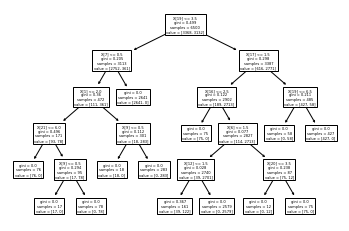

In [45]:
plot_tree(dtc)

<b>Model</b>: Decision Tree<br>
<b>Criterion</b>: 'entropy'<br>
<b>Pruning</b>: Yes (max_depth=3)<br>
<b>Cross-Validation</b>: KFold (5 folds)<br>
<b>Metrics</b>: Accuracy, F1, Precision, Recall<br>

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=None)

y_true_train = np.array([])
y_pred_train = np.array([])

y_true_test = np.array([])
y_pred_test = np.array([])

for train, test in kf.split(numerical_dataset):
    x_train, x_test = numerical_dataset.values[train], numerical_dataset.values[test]
    
    # The target class is in the first column (column 0)
    y_train = x_train[:,0]
    x_train = x_train[:,1:]
    y_test = x_test[:,0]
    x_test = x_test[:,1:]
    
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    # training
    dtc.fit(x_train, y_train)
    
    # predictions for the training set
    for indx, input_ in enumerate(x_train):
        y_true_train = np.append(y_true_train, y_train[indx])
        y_pred_train = np.append(y_pred_train, dtc.predict([input_]))
    
    # predictions for the testing set
    for indx, input_ in enumerate(x_test):
        y_true_test = np.append(y_true_test, y_test[indx])
        y_pred_test = np.append(y_pred_test, dtc.predict([input_]))
    

# Evaluating the results

print(color_for_print.BOLD + color_for_print.RED + 'Training Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_train, y_pred_train))
print('F1 score: ',f1_score(y_true_train, y_pred_train, average='macro'))
print('Precision score: ',precision_score(y_true_train, y_pred_train, average='macro'))
print('Recall score: ', recall_score(y_true_train, y_pred_train, average='macro'))
print(30*'-')
print(color_for_print.BOLD + color_for_print.BLUE + 'Testing Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_test, y_pred_test))
print('F1 score: ',f1_score(y_true_test, y_pred_test, average='macro'))
print('Precision score: ',precision_score(y_true_test, y_pred_test, average='macro'))
print('Recall score: ', recall_score(y_true_test, y_pred_test, average='macro'))

Training Set
Accuracy:  0.9645494830132939
F1 score:  0.9645494744191458
Precision score:  0.9657469077069458
Recall score:  0.9657794676806084
------------------------------
Testing Set
Accuracy:  0.9645494830132939
F1 score:  0.9645494744191458
Precision score:  0.9657469077069458
Recall score:  0.9657794676806084


PCA is better with scaled data, but I will assume the risk.

In [47]:
pca = PCA(n_components=5)

In [48]:
pca.fit(numerical_dataset.iloc[:,1:])

PCA(n_components=5)

In [49]:
print(pca.explained_variance_ratio_)

[0.27275304 0.19272019 0.13382131 0.13068795 0.08423647]


In [50]:
components_pca = pd.DataFrame(pca.components_, columns=[numerical_dataset.columns[1:]])

In [51]:
components_pca.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.049625,0.109271,-0.210980,-0.064222,0.063452,-0.005623,0.013729,-0.065590,-0.460762,-0.026396,...,-0.026353,0.165620,0.166559,-0.0,-0.004758,0.009412,-0.304152,0.468567,-0.078361,-0.214775
1,-0.052749,0.022767,0.855211,-0.012991,-0.253286,0.016968,0.011554,0.001437,-0.363370,0.030171,...,-0.024589,0.032340,0.053306,0.0,0.011821,-0.005794,-0.023327,-0.058971,-0.045657,-0.234615
2,-0.021807,0.092031,0.258614,0.022375,-0.013234,-0.005917,0.022867,-0.006599,0.752810,0.022088,...,-0.000564,0.306142,0.286642,-0.0,-0.002658,0.040903,0.029782,0.232215,-0.135849,-0.166390
3,0.069116,-0.026920,0.259391,-0.064298,0.051571,-0.004313,-0.042815,-0.023594,0.183298,0.024427,...,-0.010137,-0.451955,-0.487464,-0.0,-0.000692,0.005645,-0.174901,0.560259,0.162333,0.256040
4,-0.041886,-0.019049,-0.180093,-0.064869,-0.057538,-0.027819,0.038827,0.071839,0.147453,0.075727,...,-0.124575,-0.271313,-0.319545,-0.0,-0.019913,0.003900,-0.077605,-0.062473,-0.131581,-0.823815


In [52]:
components_pca.iloc[:,0:11]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root
0,0.049625,0.109271,-0.210980,-0.064222,0.063452,-0.005623,0.013729,-0.065590,-0.460762,-0.026396,0.542574
1,-0.052749,0.022767,0.855211,-0.012991,-0.253286,0.016968,0.011554,0.001437,-0.363370,0.030171,-0.036126
2,-0.021807,0.092031,0.258614,0.022375,-0.013234,-0.005917,0.022867,-0.006599,0.752810,0.022088,0.276786
3,0.069116,-0.026920,0.259391,-0.064298,0.051571,-0.004313,-0.042815,-0.023594,0.183298,0.024427,0.070189
4,-0.041886,-0.019049,-0.180093,-0.064869,-0.057538,-0.027819,0.038827,0.071839,0.147453,0.075727,-0.093419


In [53]:
components_pca.iloc[:,11:]

,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,-0.026789,-0.026353,0.165620,0.166559,-0.0,-0.004758,0.009412,-0.304152,0.468567,-0.078361,-0.214775
1,-0.022325,-0.024589,0.032340,0.053306,0.0,0.011821,-0.005794,-0.023327,-0.058971,-0.045657,-0.234615
2,0.023610,-0.000564,0.306142,0.286642,-0.0,-0.002658,0.040903,0.029782,0.232215,-0.135849,-0.166390
3,-0.021971,-0.010137,-0.451955,-0.487464,-0.0,-0.000692,0.005645,-0.174901,0.560259,0.162333,0.256040
4,-0.129318,-0.124575,-0.271313,-0.319545,-0.0,-0.019913,0.003900,-0.077605,-0.062473,-0.131581,-0.823815


In [54]:
np.linalg.norm(components_pca.iloc[0,:])

0.9999999999999992

In [55]:
# let's try droping the columns gill-attachment, gill-spacing, gill-size, stalk-shape, veil-type, veil-color,
# ring-number
numerical_dataset = numerical_dataset.drop(labels=['gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape',\
                               'veil-type', 'veil-color', 'ring-number'], axis=1)

In [56]:
numerical_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,3,4,1,1,8,1,4,4,4,8,8,6,1,4,5
1,0,3,4,10,1,1,1,2,4,4,8,8,6,2,3,1
2,0,1,4,9,1,2,2,2,4,4,8,8,6,2,3,3
3,1,3,3,9,1,8,2,4,4,4,8,8,6,1,4,5
4,0,3,4,4,0,7,1,4,4,4,8,8,2,2,1,1


<b>Model</b>: Decision Tree<br>
<b>Criterion</b>: 'gini'<br>
<b>Pruning</b>: Yes (max_depth=5)<br>
<b>Cross-Validation</b>: KFold (5 folds)<br>
<b>Metrics</b>: Accuracy, F1, Precision, Recall<br>

In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=None)

y_true_train = np.array([])
y_pred_train = np.array([])

y_true_test = np.array([])
y_pred_test = np.array([])

for train, test in kf.split(numerical_dataset):
    x_train, x_test = numerical_dataset.values[train], numerical_dataset.values[test]
    
    # The target class is in the first column (column 0)
    y_train = x_train[:,0]
    x_train = x_train[:,1:]
    y_test = x_test[:,0]
    x_test = x_test[:,1:]
    
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
    # training
    dtc.fit(x_train, y_train)
    
    # predictions for the training set
    for indx, input_ in enumerate(x_train):
        y_true_train = np.append(y_true_train, y_train[indx])
        y_pred_train = np.append(y_pred_train, dtc.predict([input_]))
    
    # predictions for the testing set
    for indx, input_ in enumerate(x_test):
        y_true_test = np.append(y_true_test, y_test[indx])
        y_pred_test = np.append(y_pred_test, dtc.predict([input_]))
    

# Evaluating the results

print(color_for_print.BOLD + color_for_print.RED + 'Training Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_train, y_pred_train))
print('F1 score: ',f1_score(y_true_train, y_pred_train, average='macro'))
print('Precision score: ',precision_score(y_true_train, y_pred_train, average='macro'))
print('Recall score: ', recall_score(y_true_train, y_pred_train, average='macro'))
print(30*'-')
print(color_for_print.BOLD + color_for_print.BLUE + 'Testing Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_test, y_pred_test))
print('F1 score: ',f1_score(y_true_test, y_pred_test, average='macro'))
print('Precision score: ',precision_score(y_true_test, y_pred_test, average='macro'))
print('Recall score: ', recall_score(y_true_test, y_pred_test, average='macro'))

Training Set
Accuracy:  0.9931683899556869
F1 score:  0.9931625954854685
Precision score:  0.9930127155986403
Recall score:  0.9934054182509506
------------------------------
Testing Set
Accuracy:  0.9928606597735106
F1 score:  0.9928547317430899
Precision score:  0.9927025666834424
Recall score:  0.9931083650190113


The metrics are almost the same!

In [58]:
numerical_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,3,4,1,1,8,1,4,4,4,8,8,6,1,4,5
1,0,3,4,10,1,1,1,2,4,4,8,8,6,2,3,1
2,0,1,4,9,1,2,2,2,4,4,8,8,6,2,3,3
3,1,3,3,9,1,8,2,4,4,4,8,8,6,1,4,5
4,0,3,4,4,0,7,1,4,4,4,8,8,2,2,1,1


In [59]:
pca2 = PCA(n_components=5)

In [60]:
pca2.fit(numerical_dataset.iloc[:,1:])

PCA(n_components=5)

In [61]:
components_pca2 = pd.DataFrame(pca2.components_, columns=[numerical_dataset.columns[1:]])

In [62]:
components_pca2.iloc[:,0:8]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-color,stalk-root,stalk-surface-above-ring
0,0.049367,0.109574,-0.210367,-0.064484,0.062713,-0.463001,0.543600,-0.027187
1,-0.052778,0.022495,0.856581,-0.012638,-0.253098,-0.363339,-0.038006,-0.022086
2,-0.021375,0.092689,0.261160,0.022609,-0.013455,0.752382,0.278143,0.023911
3,0.069502,-0.027802,0.259808,-0.064840,0.053899,0.182866,0.069761,-0.023121
4,-0.041637,-0.019393,-0.175150,-0.064232,-0.057790,0.155735,-0.099162,-0.130781


In [63]:
components_pca2.iloc[:,8:]

,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,-0.026824,0.165230,0.166315,-0.304834,0.469269,-0.079291,-0.217938
1,-0.024242,0.031902,0.053081,-0.022320,-0.060964,-0.045029,-0.232693
2,-0.000350,0.307497,0.288230,0.028782,0.233475,-0.135108,-0.163761
3,-0.010974,-0.453230,-0.488967,-0.177148,0.560454,0.161459,0.254481
4,-0.125692,-0.269324,-0.318583,-0.078955,-0.068538,-0.130462,-0.831130


In [64]:
# Let's try droping the columns cap-shape, cap-surface, bruises, stalk-surface-above-ring, stalk-surface-below-ring
numerical_dataset = numerical_dataset.drop(labels=['cap-shape', 'cap-surface', 'bruises', 'stalk-surface-above-ring',\
                                                   'stalk-surface-below-ring'], axis=1)

In [65]:
numerical_dataset.head()

,class,cap-color,odor,gill-color,stalk-root,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,1,8,1,4,8,8,6,1,4,5
1,0,10,1,1,2,8,8,6,2,3,1
2,0,9,2,2,2,8,8,6,2,3,3
3,1,9,8,2,4,8,8,6,1,4,5
4,0,4,7,1,4,8,8,2,2,1,1


<b>Model</b>: Decision Tree<br>
<b>Criterion</b>: 'gini'<br>
<b>Pruning</b>: Yes (max_depth=5)<br>
<b>Cross-Validation</b>: KFold (5 folds)<br>
<b>Metrics</b>: Accuracy, F1, Precision, Recall<br>

In [66]:
kf = KFold(n_splits=5, shuffle=True, random_state=None)

y_true_train = np.array([])
y_pred_train = np.array([])

y_true_test = np.array([])
y_pred_test = np.array([])

for train, test in kf.split(numerical_dataset):
    x_train, x_test = numerical_dataset.values[train], numerical_dataset.values[test]
    
    # The target class is in the first column (column 0)
    y_train = x_train[:,0]
    x_train = x_train[:,1:]
    y_test = x_test[:,0]
    x_test = x_test[:,1:]
    
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
    # training
    dtc.fit(x_train, y_train)
    
    # predictions for the training set
    for indx, input_ in enumerate(x_train):
        y_true_train = np.append(y_true_train, y_train[indx])
        y_pred_train = np.append(y_pred_train, dtc.predict([input_]))
    
    # predictions for the testing set
    for indx, input_ in enumerate(x_test):
        y_true_test = np.append(y_true_test, y_test[indx])
        y_pred_test = np.append(y_pred_test, dtc.predict([input_]))
    

# Evaluating the results

print(color_for_print.BOLD + color_for_print.RED + 'Training Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_train, y_pred_train))
print('F1 score: ',f1_score(y_true_train, y_pred_train, average='macro'))
print('Precision score: ',precision_score(y_true_train, y_pred_train, average='macro'))
print('Recall score: ', recall_score(y_true_train, y_pred_train, average='macro'))
print(30*'-')
print(color_for_print.BOLD + color_for_print.BLUE + 'Testing Set' + color_for_print.END)
print('Accuracy: ', accuracy_score(y_true_test, y_pred_test))
print('F1 score: ',f1_score(y_true_test, y_pred_test, average='macro'))
print('Precision score: ',precision_score(y_true_test, y_pred_test, average='macro'))
print('Recall score: ', recall_score(y_true_test, y_pred_test, average='macro'))

Training Set
Accuracy:  0.9932299359921221
F1 score:  0.9932241693977668
Precision score:  0.9930747922437673
Recall score:  0.9934648288973384
------------------------------
Testing Set
Accuracy:  0.9926144756277696
F1 score:  0.9926084476478414
Precision score:  0.9924547283702213
Recall score:  0.9928707224334601


The metrics are even better now!

In [67]:
pca3 = PCA(n_components=5)

In [68]:
pca3.fit(numerical_dataset.iloc[:,1:])

PCA(n_components=5)

In [69]:
components_pca3 = pd.DataFrame(pca3.components_, columns=[numerical_dataset.columns[1:]])

In [70]:
components_pca3

,cap-color,odor,gill-color,stalk-root,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,-0.218595,0.065595,-0.472133,0.547693,0.168075,0.169345,-0.306017,0.470062,-0.079413,-0.217250
1,0.858450,-0.251185,-0.370784,-0.034619,0.030795,0.052257,-0.024748,-0.056396,-0.043031,-0.227962
2,0.311031,0.002107,0.768530,0.294892,0.213357,0.186654,-0.015242,0.346825,-0.103083,-0.118944
3,0.192635,0.052930,0.022506,0.017374,-0.506400,-0.536966,-0.176369,0.511675,0.188563,0.293318
4,-0.170700,-0.071298,0.140450,-0.093161,-0.285740,-0.333590,-0.066541,-0.054397,-0.124359,-0.849465


In [71]:
# saving the model
pickle.dump(dtc, open('decision_tree_for_mushrooms_dataset.sav', 'wb'))

In [72]:
# To load the model
loaded_dtc = pickle.load(open('decision_tree_for_mushrooms_dataset.sav', 'rb'))

In [73]:
type(loaded_dtc)

sklearn.tree._classes.DecisionTreeClassifier

In [74]:
y_test[indx]

0

In [75]:
input_

array([ 1,  7, 12,  7,  5,  5,  6,  6,  2,  2], dtype=int64)

In [77]:
dtc.predict([input_])

array([0], dtype=int64)

In [78]:
loaded_dtc.predict([input_])

array([0], dtype=int64)